# Data Profiling & Validation Notebook

**Project:** Global Economy Analysis

**Step:** Post-Ingestion QA (Schema Validation + Profiling)

This notebook runs after `src/data_ingestion.py` to:
1. Validate schema using Pandera
2. Generate summary statistics and missing data profile
3. Save a profiling report for later review

## 1️⃣ Setup

In [8]:
import pandas as pd
import pandera as pa
from pandera import Column, Check
from skimpy import skim
from pathlib import Path

In [13]:
# Paths
DATA_DIR = Path("D:\courses\Data Science\Projects\Python\world-economy-bi-project\data")
INGESTED_FILE = DATA_DIR / "ingested_data.csv"

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HELAL\AppData\Local\Temp\ipykernel_23252\1927831913.py:2: SyntaxWarning: invalid escape sequence '\c'
  DATA_DIR = Path("D:\courses\Data Science\Projects\Python\world-economy-bi-project\data")


## 2️⃣ Load Data

In [14]:
print(f"📥 Loading ingested dataset from {INGESTED_FILE}")
df = pd.read_csv(INGESTED_FILE)
print(f"✅ Loaded data with shape: {df.shape}")
df.head()

📥 Loading ingested dataset from D:\courses\Data Science\Projects\Python\world-economy-bi-project\data\ingested_data.csv
✅ Loaded data with shape: (12449, 1023)


,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38


## 3️⃣ Profiling (Descriptive Statistics)

In [17]:
print("📊 Generating data skim summary...")
skim(df)

📊 Generating data skim summary...


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12449  │ │ float64     │ 1014  │                                                          │
│ │ Number of columns │ 1023   │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0      ┃ p25      ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year    │    0 │       0 │     1989 │   17.03 │    1960 │     1974 │    1989 │     2004 │    2018 │ ▇▇▇▇▇▇ │  │
│ │ Birth   │ 1009 │ 8.10506 │    28.64 │   13.13 │     6.9 │     16.6 │   27.55 │    40.88 │   58.23 │ ▇▇▅▆▇▁ │  │
│ │ rate,   │      │ 8680215 │          │         │         │          │         │          │         │        │  │
│ │ crude   │      │     279 │          │         │         │          │         │          │         │        │  │
│ │ (per    │      │         │          │         │         │          │         │          │         │        │  │
│ │ 1,000   │      │         │          │         │         │          │         │          │         │        │  │
│ │ people) │      │         │          │         │         │          │         │          │         │        │  │
│ │ Death   │ 1033 │ 8.29785 │    10.59 │   5.489 │   1.127 │    6.864 │     9.2 │    12.69 │   54.44 │  ▇▅▁   │  │
│ │ rate,   │      │ 5249417 │          │         │         │          │         │          │         │        │  │
│ │ crude   │      │     625 │          │         │         │          │         │          │         │        │  │
│ │ (per    │      │         │          │         │         │          │         │          │         │        │  │
│ │ 1,000   │      │         │          │         │         │          │         │          │         │        │  │
│ │ people) │      │         │          │         │         │          │         │          │         │        │  │
│ │ Electri │ 6601 │ 53.0243 │     3175 │    4467 │       0 │    390.4 │    1542 │     4314 │   54800 │   ▇▁   │  │
│ │ c power │      │ 3930436 │          │         │         │          │         │          │         │        │  │
│ │ consump │      │    1796 │          │         │         │          │         │          │         │        │  │
│ │ tion    │      │         │          │         │         │          │         │          │         │        │  │
│ │ (kWh    │      │         │          │         │         │          │         │          │         │        │  │
│ │ per     │      │         │          │         │         │          │         │          │         │        │  │
│ │ capita) │      │         │          │         │         │          │         │          │         │        │  │
│ │ GDP     │ 2871 │ 23.0620 │ 17010000 │ 8980000 │ 8824000 │ 13930000 │ 7275000 │ 48580000 │ 2050000 │   ▇    │  │
│ │ (USD)   │      │ 9334083 │     0000 │   00000 │     

## 4️⃣ Missing Values Heatmap

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

d:\courses\Data Science\Projects\Python\world-economy-bi-project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


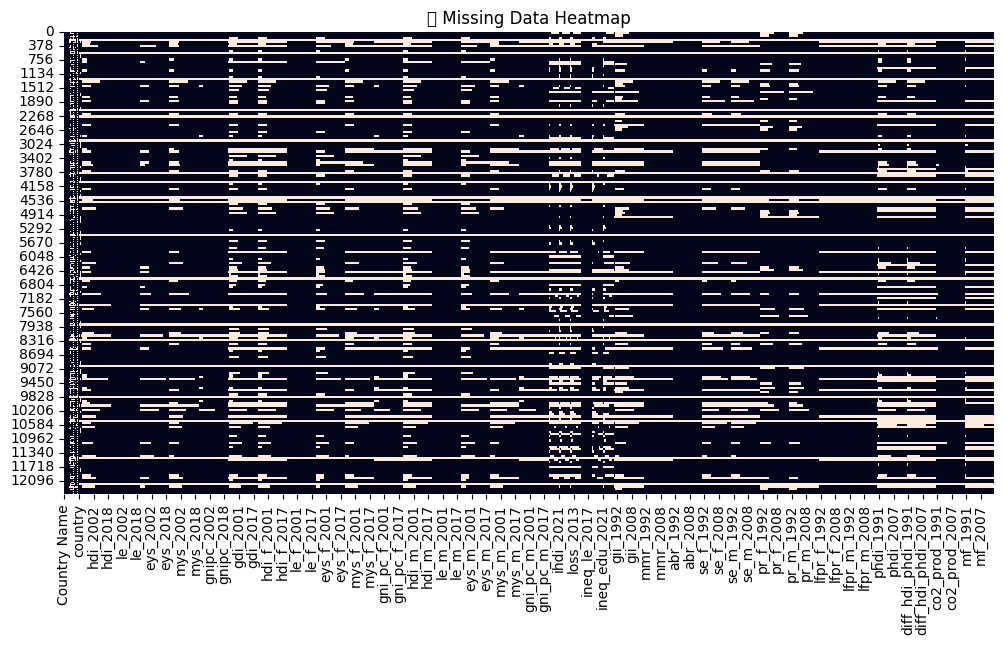

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("🔎 Missing Data Heatmap")
plt.show()

## 5️⃣ Key Insights Snapshot

In [22]:
print(f"📌 Total rows: {len(df)}")
print(f"🌍 Unique countries: {df['Country Code'].nunique()}")
print(f"📅 Years covered: {df['Year'].min()} → {df['Year'].max()}")
print(f"💰 Average GDP per capita (USD): {df['GDP per capita (USD)'].mean():,.2f}")

📌 Total rows: 12449
🌍 Unique countries: 211
📅 Years covered: 1960 → 2018
💰 Average GDP per capita (USD): 8,231.81


## 7️⃣ Save QA Report

In [23]:
report_path = DATA_DIR / "profiling_report.csv"
profile_summary = df.describe(include='all')
profile_summary.to_csv(report_path)
print(f"💾 Profiling summary saved to {report_path}")

💾 Profiling summary saved to D:\courses\Data Science\Projects\Python\world-economy-bi-project\data\profiling_report.csv
